# Using FIt-SNE

Author: Dmitry Kobak

In [1]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()

# change the path!
import sys; sys.path.append('/home/dmitry/github/kerind/FIt-SNE')
from fast_tsne import fast_tsne

In [2]:
# Load MNIST data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float64') / 255
x_test  =  x_test.reshape(10000, 784).astype('float64') / 255
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(X.shape)

# Do PCA and keep 50 dimensions
X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X, full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]

# We will use PCA initialization later on
PCAinit = X50[:,:2] / np.std(X50[:,0]) * 0.0001

# 10 nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

/home/dmitry/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(70000, 784)


<IPython.core.display.Javascript object>


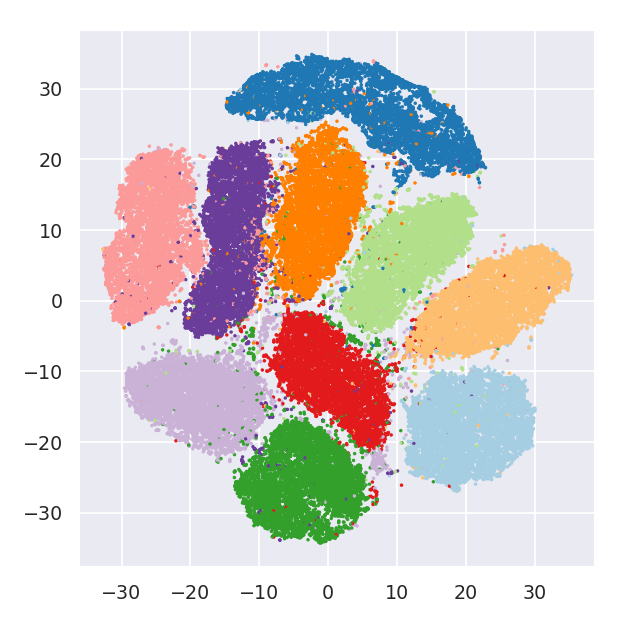

In [3]:
# Running t-SNE on the full MNIST in the default way

Z = fast_tsne(X50, perplexity=50, seed=42)

plt.figure(figsize=(5,5))
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=1)
plt.tight_layout()

<IPython.core.display.Javascript object>


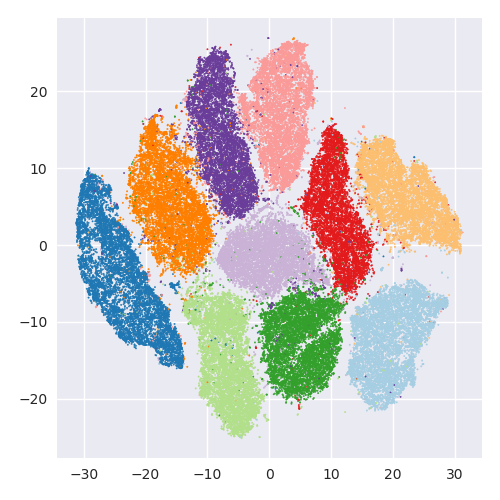

In [4]:
# Two classes are separated into two parts on the above figure. 
# This can be fixed if one uses stronger/longer early exaggeration (e.g. stop_early_exag_iter=500)
# or higher learning rate (e.g. learning rate=1000)

# PCA initialization is not important for MNIST, but can be handy for other datasets

Z1 = fast_tsne(X50, perplexity=50, stop_early_exag_iter=500, initialization=PCAinit)

Z2 = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=1)
plt.title('Early exaggeration for 500 iterations')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=1)
plt.title('Learning rate 1000')
plt.tight_layout()

## Showcase of various other options

In [3]:
# Subsampling 

np.random.seed(42)
ind1k = np.random.choice(X.shape[0], 1000, replace=False)
ind5k = np.random.choice(X.shape[0], 5000, replace=False)

### 1-dimensional projection

<IPython.core.display.Javascript object>


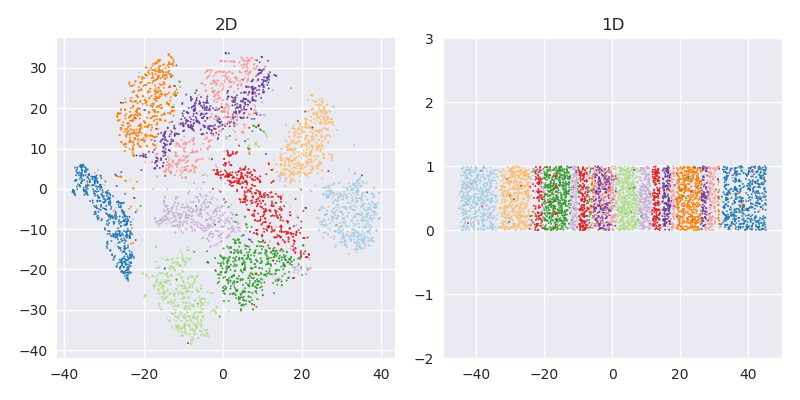

In [6]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

Z2 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:], map_dims=1)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('2D')
plt.subplot(122)
plt.scatter(Z2[:,0], np.random.uniform(size=Z2.shape[0]), c=col[y[ind5k]], s=1)
plt.ylim([-2,3])
plt.title('1D')
plt.tight_layout()

### VP tree vs ANNOY

<IPython.core.display.Javascript object>


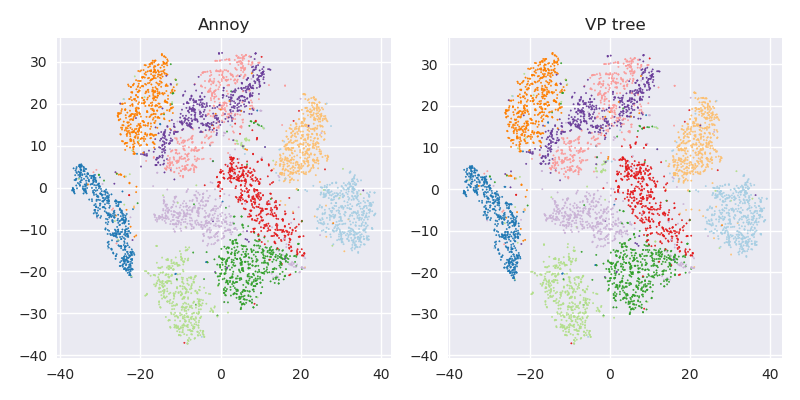

In [7]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

Z2 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:], 
               knn_algo='vp-tree')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Annoy')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('VP tree')
plt.tight_layout()

### Barnes-Hut vs FFT

<IPython.core.display.Javascript object>


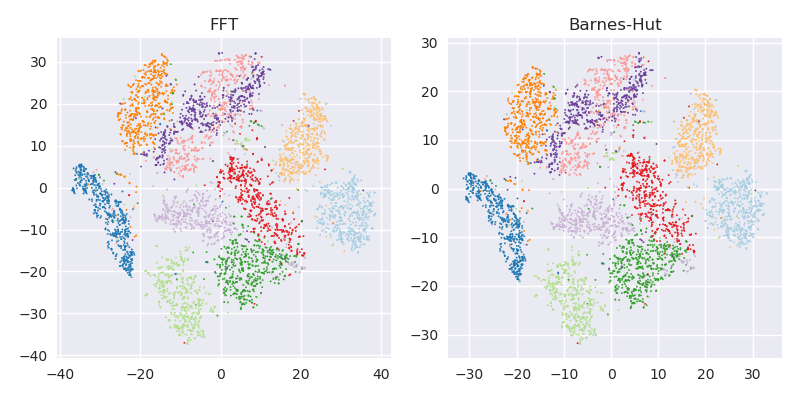

In [6]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

Z2 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:], 
               nbody_algo='Barnes-Hut')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('FFT')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Barnes-Hut')
plt.tight_layout()

### Exact t-SNE

<IPython.core.display.Javascript object>


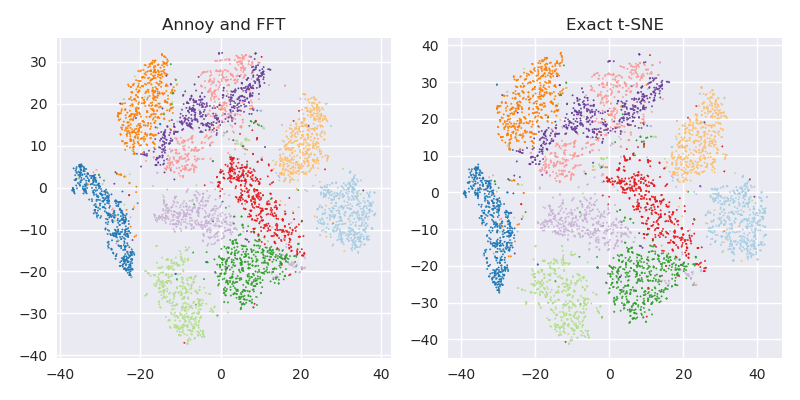

In [11]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

Z2 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:], theta=0)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Annoy and FFT')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Exact t-SNE')
plt.tight_layout()

### Late exaggeration

<IPython.core.display.Javascript object>


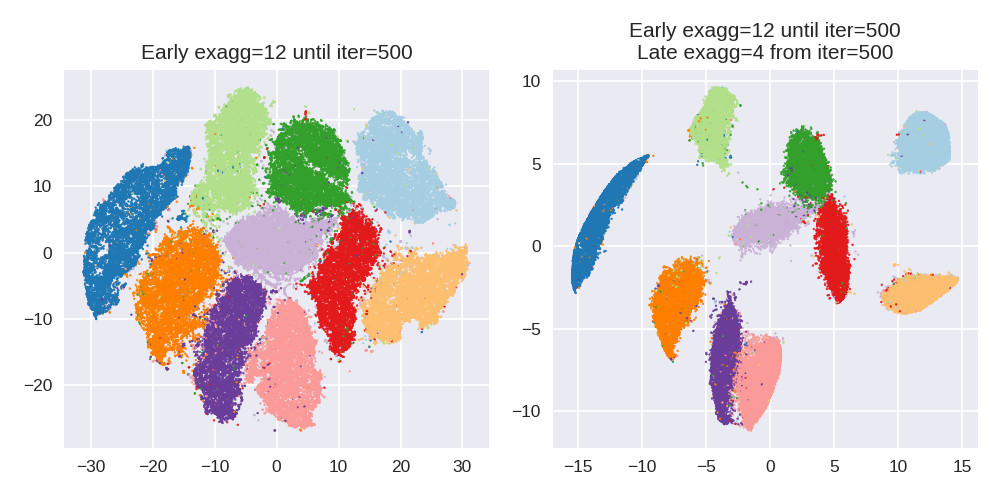

In [9]:
Z1 = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit)

Z2 = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, 
               late_exag_coeff=4, start_late_exag_iter=250)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=1)
plt.title('Early exagg=12 until iter=250')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=1)
plt.title('Early exagg=12 until iter=250\nLate exagg=4 from iter=250')
plt.tight_layout()

### Loading and saving input similarities

<IPython.core.display.Javascript object>


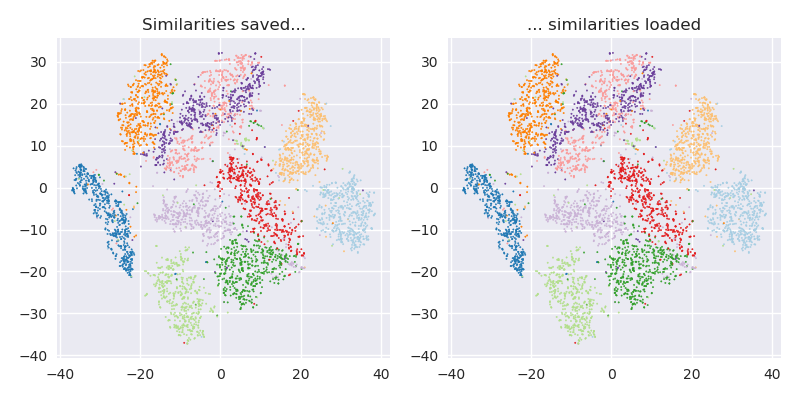

<IPython.core.display.Javascript object>


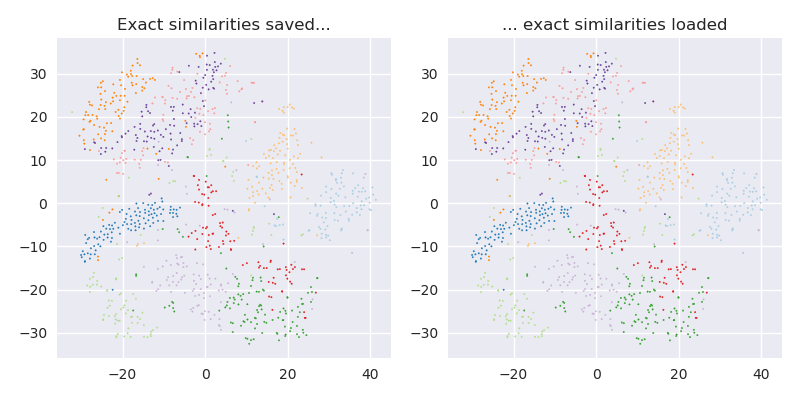

In [12]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:], 
               load_affinities = 'save')

Z2 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:], 
               load_affinities = 'load')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Similarities saved...')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('... similarities loaded')
plt.tight_layout()

# And now for the exact t-SNE

Z1 = fast_tsne(X50[ind1k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind1k,:], theta=0, 
               load_affinities = 'save')

Z2 = fast_tsne(X50[ind1k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind1k,:], theta=0, 
               load_affinities = 'load')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind1k]], s=1)
plt.title('Exact similarities saved...')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind1k]], s=1)
plt.title('... exact similarities loaded')
plt.tight_layout()

### Fixed sigma instead of perplexity

<IPython.core.display.Javascript object>


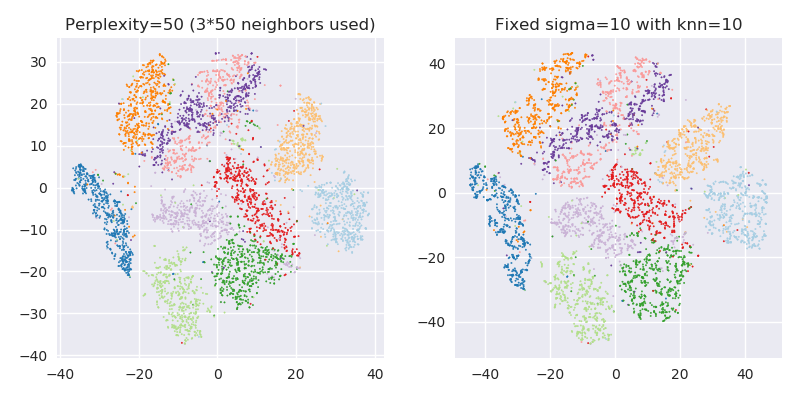

In [21]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

Z2 = fast_tsne(X50[ind5k,:], sigma=10, K=10, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Perplexity=50 (3*50 neighbors used)')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Fixed sigma=10 with knn=10')
plt.tight_layout()

### Perplexity combination

<IPython.core.display.Javascript object>


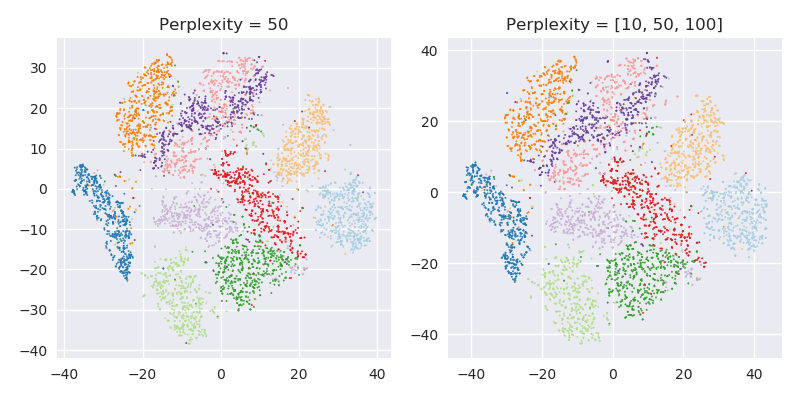

In [10]:
Z1 = fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

Z2 = fast_tsne(X50[ind5k,:], perplexity_list=[10,50,100], max_iter=500, early_exag_coeff=4, 
               stop_early_exag_iter=100, initialization=PCAinit[ind5k,:])

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Perplexity = 50')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Perplexity = [10, 50, 100]')
plt.tight_layout()

### Making the kernel more heavy-tailed

In [ ]:
Z1 = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit)

Z2 = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, df=.5)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=1)
plt.title('1/(1+x^2) kernel')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=1)
plt.title('1/(1+x^2/0.5)^0.5 kernel')
plt.tight_layout()